 Please upload your CSV file...


Saving Day3_House_Price_data (1).csv to Day3_House_Price_data (1) (1).csv
 File uploaded: Day3_House_Price_data (1) (1).csv
Initial Dataset Shape: (20640, 9)

Missing Values:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64
 An unexpected error occurred:
index 0 is out of bounds for axis 0 with size 0
 Please ensure the uploaded file is a valid CSV.


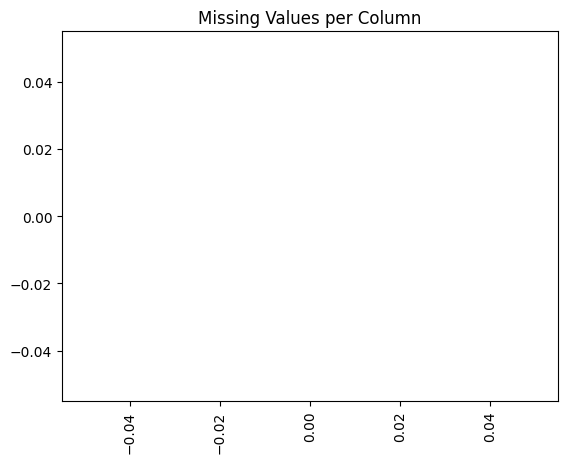

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



try:
    from google.colab import files
    import io

    print(" Please upload your CSV file...")
    uploaded = files.upload()


    if len(uploaded) == 0:
        print(" No file uploaded. Please re-run the cell and upload a CSV file.")

    else:
        filename = list(uploaded.keys())[0]
        print(f" File uploaded: {filename}")

        df = pd.read_csv(io.BytesIO(uploaded[filename]))
        print("Initial Dataset Shape:", df.shape)


        missing = df.isnull().sum()
        print("\nMissing Values:\n", missing)

        missing[missing > 0].plot(kind='bar', title='Missing Values per Column')
        plt.show()


        num_cols = df.select_dtypes(include=np.number).columns
        cat_cols = df.select_dtypes(include='object').columns


        for col in num_cols:
            df[col] = df[col].fillna(df[col].median())

        for col in cat_cols:
            df[col] = df[col].fillna(df[col].mode()[0])


        df = df.loc[:, df.isnull().mean() < 0.4]

        print("\nMissing After Cleaning:\n", df.isnull().sum())
        print("Final Dataset Shape:", df.shape)


        df.to_csv("Cleaned_Dataset.csv", index=False)
        files.download("Cleaned_Dataset.csv")

        print("\n TASK 2 COMPLETED SUCCESSFULLY")

except Exception as e:
    print(" An unexpected error occurred:")
    print(e)
    print(" Please ensure the uploaded file is a valid CSV.")

